In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from wordcloud import WordCloud

In [5]:
df=pd.read_csv("coursera_courses.csv")


In [6]:
df.head()

,Unnamed: 0,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,"38,833",[],[],We have all heard the phrase “correlation does...
4,918,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...


In [7]:
df.tail()

,Unnamed: 0,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
995,412,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,4.6k,Intermediate,https://www.coursera.org/learn/etudier-en-france,"516,758",[],[],Ce cours de français de niveau intermédiaire B...
996,571,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,1.2k,Beginner,https://www.coursera.org/professional-certific...,"7,584","['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,863,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256,Beginner,https://www.coursera.org/professional-certific...,"2,716","['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,820,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154,Beginner,https://www.coursera.org/professional-certific...,"2,624","['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...
999,887,用 Python 做商管程式設計（一）(Programming for Business C...,National Taiwan University,Course,1 - 3 Months,4.9,809,Beginner,https://www.coursera.org/learn/pbc1,"38,453",[],[],本系列課程從零開始，教授一般認為最適合初學者的程式語言「Python」，目標是讓大家在完成本...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   course_title              1000 non-null   object 
 2   course_organization       1000 non-null   object 
 3   course_certificate_type   1000 non-null   object 
 4   course_time               1000 non-null   object 
 5   course_rating             994 non-null    float64
 6   course_reviews_num        994 non-null    object 
 7   course_difficulty         1000 non-null   object 
 8   course_url                1000 non-null   object 
 9   course_students_enrolled  964 non-null    object 
 10  course_skills             1000 non-null   object 
 11  course_summary            1000 non-null   object 
 12  course_description        999 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.7+ KB


In [9]:
df.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_certificate_type', 'course_time', 'course_rating',
       'course_reviews_num', 'course_difficulty', 'course_url',
       'course_students_enrolled', 'course_skills', 'course_summary',
       'course_description'],
      dtype='object')

In [10]:
df.shape

(1000, 13)

In [11]:
df.describe()

,Unnamed: 0,course_rating
count,1000.000000,994.000000
mean,499.500000,4.681288
std,288.819436,0.184745
min,0.000000,2.700000
25%,249.750000,4.600000
50%,499.500000,4.700000
75%,749.250000,4.800000
max,999.000000,5.000000


In [12]:
df.isnull().sum()/len(df)

Unnamed: 0                  0.000
course_title                0.000
course_organization         0.000
course_certificate_type     0.000
course_time                 0.000
course_rating               0.006
course_reviews_num          0.006
course_difficulty           0.000
course_url                  0.000
course_students_enrolled    0.036
course_skills               0.000
course_summary              0.000
course_description          0.001
dtype: float64

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,Unnamed: 0,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,"38,833",[],[],We have all heard the phrase “correlation does...
5,433,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361,Beginner,https://www.coursera.org/learn/ai-law,"25,442",[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...


In [15]:
df=df.drop(['Unnamed: 0','course_url'],axis=1)


In [16]:
df.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,"38,833",[],[],We have all heard the phrase “correlation does...
5,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361,Beginner,"25,442",[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...


In [17]:
df.duplicated().sum()

0

In [18]:
df['course_reviews_num'] = pd.to_numeric(df['course_reviews_num'], errors='coerce')

In [19]:
df

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484.0,Beginner,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49.0,Intermediate,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59.0,Beginner,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515.0,Intermediate,"38,833",[],[],We have all heard the phrase “correlation does...
5,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361.0,Beginner,"25,442",[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...
...,...,...,...,...,...,...,...,...,...,...,...
995,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,NaN,Intermediate,"516,758",[],[],Ce cours de français de niveau intermédiaire B...
996,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,NaN,Beginner,"7,584","['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256.0,Beginner,"2,716","['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154.0,Beginner,"2,624","['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...


In [20]:
def Convert(ele):
    ele=str(ele)
    temp=""
    
    for i in range(len(ele)):
        if ele[i]==",":
            pass
        else:
            temp=temp+ele[i]            
    return int(temp)
        

In [21]:
df['course_students_enrolled']=df['course_students_enrolled'].apply(Convert)


In [22]:
df.describe()

,course_rating,course_reviews_num,course_students_enrolled
count,962.000000,348.000000,9.620000e+02
mean,4.685031,381.456897,1.415492e+05
std,0.175397,287.291317,3.154111e+05
min,2.700000,6.000000,1.536000e+03
25%,4.600000,135.250000,1.565875e+04
50%,4.700000,317.000000,4.640450e+04
75%,4.800000,596.750000,1.356610e+05
max,5.000000,998.000000,4.584160e+06


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='course_rating'>

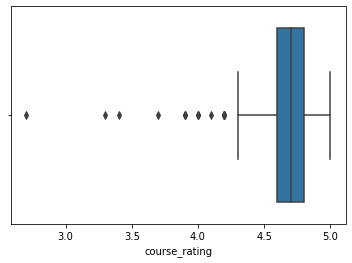

In [23]:
sns.boxplot(df['course_rating'])

In [24]:
q1=df['course_rating'].quantile(0.25)

In [25]:
q3=df['course_rating'].quantile(0.75)

In [26]:
IQR=q3-q1

In [27]:
lower=q1-1.5*IQR

In [28]:
upper=q3+1.5*IQR

In [29]:
df=df[(df['course_rating']>lower) & (df['course_rating']<upper)]

In [30]:
df

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484.0,Beginner,6706,"['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49.0,Intermediate,2140,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59.0,Beginner,4282,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515.0,Intermediate,38833,[],[],We have all heard the phrase “correlation does...
5,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361.0,Beginner,25442,[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...
...,...,...,...,...,...,...,...,...,...,...,...
995,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,NaN,Intermediate,516758,[],[],Ce cours de français de niveau intermédiaire B...
996,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,NaN,Beginner,7584,"['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256.0,Beginner,2716,"['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154.0,Beginner,2624,"['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='course_students_enrolled'>

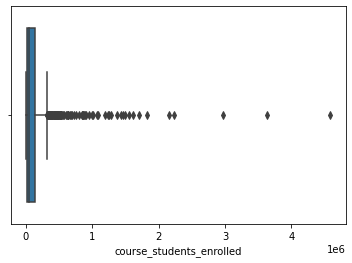

In [31]:
sns.boxplot(df['course_students_enrolled'])


In [32]:
q1=df['course_students_enrolled'].quantile(0.25)

In [33]:
q3=df['course_students_enrolled'].quantile(0.75)

In [34]:
IQR=q3-q1

In [35]:
lower=q1-1.5*IQR

In [36]:
upper=q3+1.5*IQR

In [37]:
df=df[(df['course_students_enrolled']>lower) & (df['course_students_enrolled']<upper)]

In [38]:
df

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484.0,Beginner,6706,"['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49.0,Intermediate,2140,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59.0,Beginner,4282,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515.0,Intermediate,38833,[],[],We have all heard the phrase “correlation does...
5,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361.0,Beginner,25442,[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...
...,...,...,...,...,...,...,...,...,...,...,...
992,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Course,3 - 6 Months,4.6,190.0,Beginner,65115,"['Script Writing', 'Filmmaking', 'Screenwritin...",['You will learn how to write and complete a f...,Write a Full Length Feature Film Script\nIn th...
996,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,NaN,Beginner,7584,"['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256.0,Beginner,2716,"['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154.0,Beginner,2624,"['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='course_difficulty', ylabel='count'>

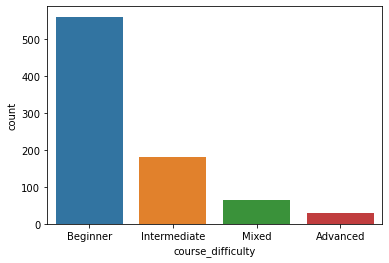

In [39]:
sns.countplot(df['course_difficulty'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Specialization'),
  Text(1, 0, 'Course'),
  Text(2, 0, 'Professional Certificate'),
  Text(3, 0, 'Guided Project')])

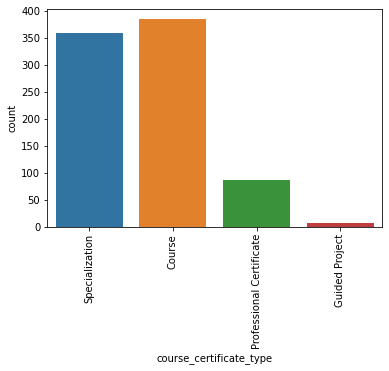

In [40]:
sns.countplot(df['course_certificate_type'])
plt.xticks(rotation=90)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='course_time', ylabel='count'>

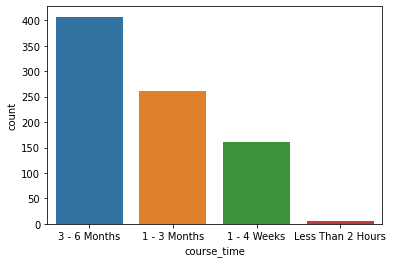

In [41]:
sns.countplot(df['course_time'])

<AxesSubplot:xlabel='course_difficulty', ylabel='course_rating'>

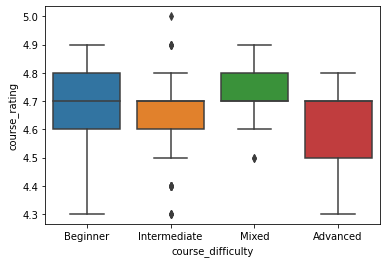

In [42]:
sns.boxplot(x=df['course_difficulty'],y=df['course_rating'])

<AxesSubplot:xlabel='course_time', ylabel='course_rating'>

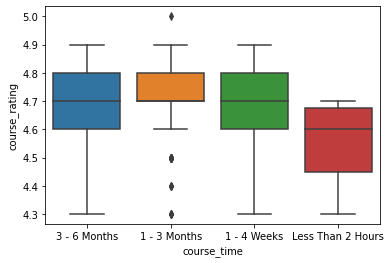

In [43]:
sns.boxplot(x=df['course_time'],y=df['course_rating'])

<AxesSubplot:xlabel='course_certificate_type', ylabel='course_rating'>

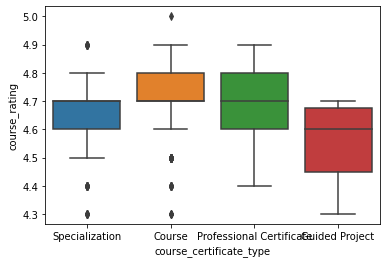

In [44]:
sns.boxplot(x=df['course_certificate_type'],y=df['course_rating'])

<AxesSubplot:xlabel='course_certificate_type', ylabel='course_students_enrolled'>

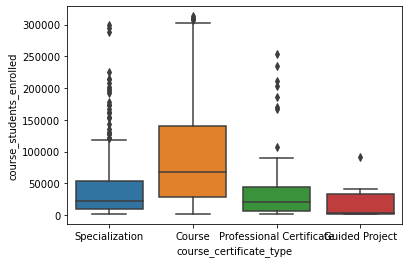

In [45]:
sns.boxplot(x=df['course_certificate_type'],y=df['course_students_enrolled'])

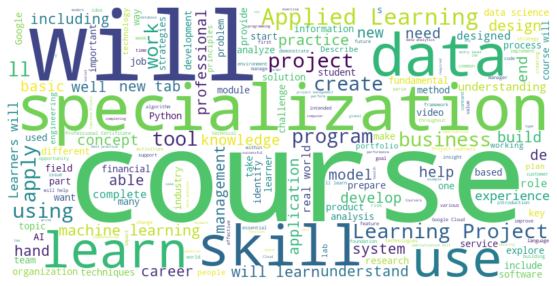

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['course_description']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

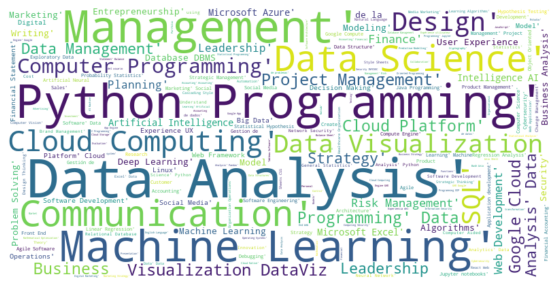

In [47]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['course_skills']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

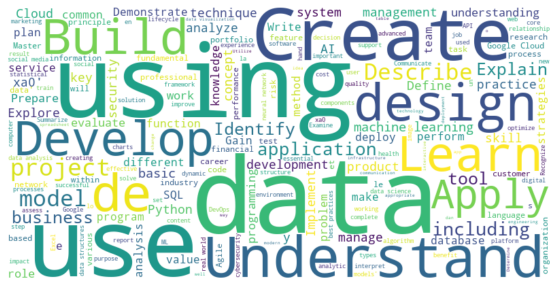

In [48]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['course_summary']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
df.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484.0,Beginner,6706,"['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49.0,Intermediate,2140,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59.0,Beginner,4282,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515.0,Intermediate,38833,[],[],We have all heard the phrase “correlation does...
5,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361.0,Beginner,25442,[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...


<AxesSubplot:xlabel='course_difficulty', ylabel='course_students_enrolled'>

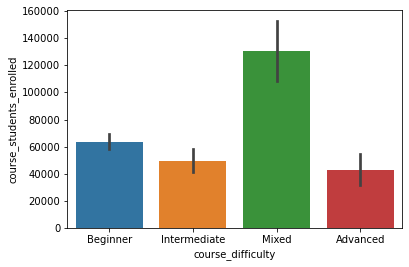

In [50]:
sns.barplot(x=df['course_difficulty'],y=df['course_students_enrolled'])

<AxesSubplot:xlabel='course_time', ylabel='course_students_enrolled'>

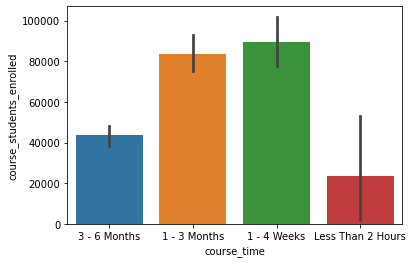

In [51]:
sns.barplot(x=df['course_time'],y=df['course_students_enrolled'])

<AxesSubplot:xlabel='course_certificate_type', ylabel='course_students_enrolled'>

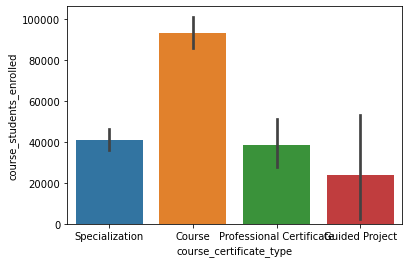

In [52]:
sns.barplot(x=df['course_certificate_type'],y=df['course_students_enrolled'])

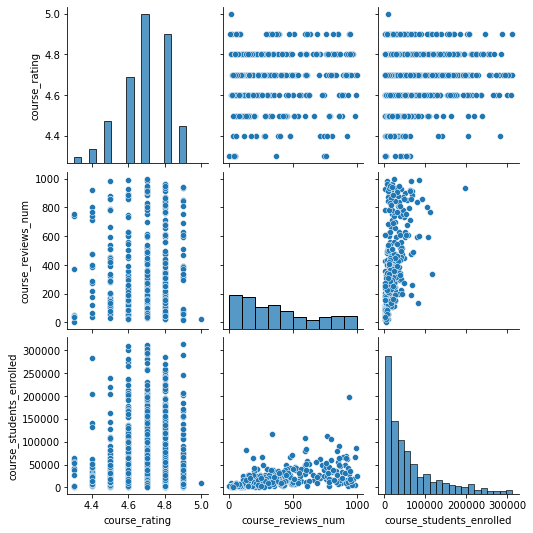

In [53]:
sns.pairplot(df)

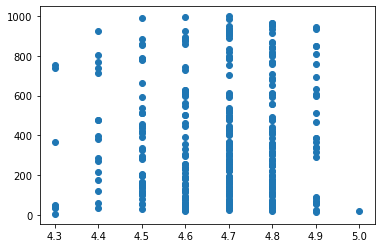

In [54]:
plt.scatter(x=df['course_rating'],y=df['course_reviews_num'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='course_rating', ylabel='Density'>

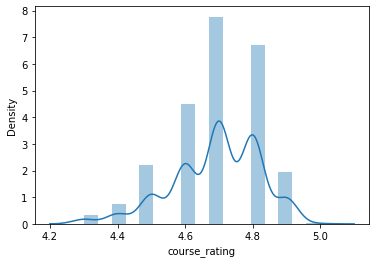

In [55]:
sns.distplot(df['course_rating'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='course_students_enrolled', ylabel='Density'>

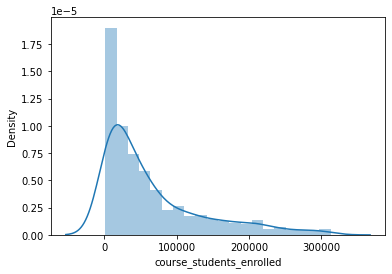

In [56]:
sns.distplot(df['course_students_enrolled'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='course_reviews_num', ylabel='Density'>

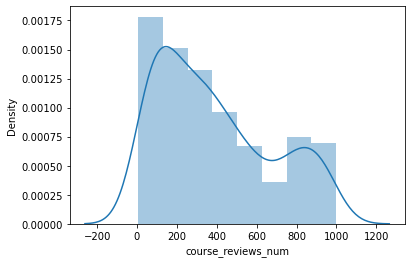

In [57]:
sns.distplot(df['course_reviews_num'])

<AxesSubplot:>

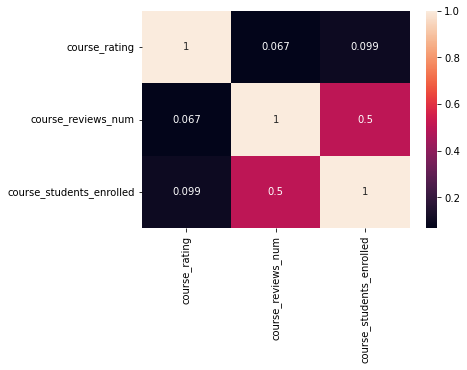

In [58]:
sns.heatmap(data=df.corr(),annot=True)

In [59]:
df['course_reviews_num'].isnull().sum()

500

In [60]:
df.isnull().sum()

course_title                  0
course_organization           0
course_certificate_type       0
course_time                   0
course_rating                 0
course_reviews_num          500
course_difficulty             0
course_students_enrolled      0
course_skills                 0
course_summary                0
course_description            0
dtype: int64

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [62]:
data = df[['course_rating', 'course_reviews_num', 'course_students_enrolled']]

In [63]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_scaled)


C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


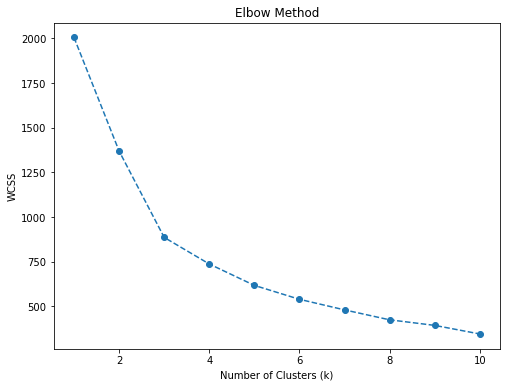

In [64]:
# Use the Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_imputed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [65]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_imputed)

df['cluster'] = cluster_labels

C:\Users\himanshu\AppData\Local\Temp\ipykernel_3908\1379736458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_labels


In [69]:
df.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills,course_summary,course_description,cluster
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484.0,Beginner,6706,"['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...,2
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49.0,Intermediate,2140,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...,0
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59.0,Beginner,4282,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu...",2
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515.0,Intermediate,38833,[],[],We have all heard the phrase “correlation does...,2
5,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361.0,Beginner,25442,[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...,2


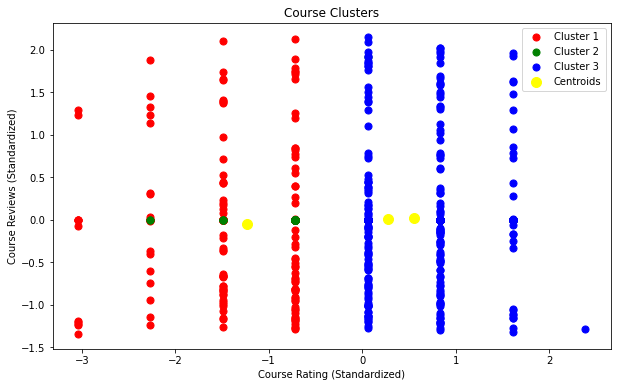

In [66]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(data_imputed[cluster_labels == i, 0], data_imputed[cluster_labels == i, 1], s=50, c=colors[i], label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Course Clusters')
plt.xlabel('Course Rating (Standardized)')
plt.ylabel('Course Reviews (Standardized)')
plt.legend()
plt.show()